___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**WELCOME!**

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


**Determines**

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






**Tasks**
- 1. Import Modules, Load Data and Data Review
- 2. Data Pre-Processing
- 3. Implement Linear Regression 
- 4. Implement Ridge Regression
- 5. Implement Lasso Regression 
- 6. Implement Elastic-Net
- 7. Visually Compare Models Performance In a Graph

# 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

In [3]:
df_origin = pd.read_csv('./final_scout_not_dummy.csv')
df = df_origin
df.head()

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.0,Used,1,Metallic,5.0,Automatic,1422.0,1220.0,front,Diesel (Particulate Filter),99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,12.000000,Cloth,3.8
1,Audi A1,Sedans,14500,80000.0,Used,0,Metallic,4.0,Automatic,1798.0,1255.0,front,Benzine,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,141.0,15.646154,Cloth,5.6
2,Audi A1,Sedans,14640,83450.0,Used,0,Metallic,4.0,Automatic,1598.0,1250.0,front,Diesel (Particulate Filter),99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,85.0,12.000000,Cloth,3.8
3,Audi A1,Sedans,14500,73000.0,Used,0,Metallic,4.0,Automatic,1422.0,1195.0,front,Diesel (Particulate Filter),99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,3.0,66.0,12.000000,Cloth,3.8
4,Audi A1,Sedans,16790,16200.0,Used,1,Metallic,5.0,Automatic,1422.0,1195.0,front,Diesel (Particulate Filter),109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.0,3.0,66.0,12.000000,Cloth,4.1


In [4]:
df.shape

(14478, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14478 non-null  object 
 1   body_type            14478 non-null  object 
 2   price                14478 non-null  int64  
 3   km                   14478 non-null  float64
 4   type                 14478 non-null  object 
 5   inspection_new       14478 non-null  int64  
 6   paint_type           14478 non-null  object 
 7   nr_of_seats          14478 non-null  float64
 8   gearing_type         14478 non-null  object 
 9   displacement_cc      14478 non-null  float64
 10  weight_kg            14478 non-null  float64
 11  drive_chain          14478 non-null  object 
 12  fuel                 14478 non-null  object 
 13  co_2_emission        14478 non-null  float64
 14  comfort_convenience  14478 non-null  object 
 15  entertainment_media  14478 non-null 

In [6]:
df.describe(include='O').T

,count,unique,top,freq
make_model,14478,9,Audi A3,2815
body_type,14478,8,Sedans,7366
type,14478,5,Used,10213
paint_type,14478,3,Metallic,13990
gearing_type,14478,3,Manual,7354
drive_chain,14478,3,front,14290
fuel,14478,6,Benzine,7412
comfort_convenience,14478,6196,"Air conditioning,Electrical side mirrors,Hill ...",209
entertainment_media,14478,346,"Bluetooth,Hands-free equipment,On-board comput...",1340
extras,14478,659,Alloy wheels,4168


In [7]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
price,14478.0,18133.509532,7423.709158,4950.0,12950.0,16977.0,21900.00,74600.0
km,14478.0,32186.251934,36787.168553,0.0,3992.5,20600.0,46309.75,317000.0
inspection_new,14478.0,0.662661,0.472818,0.0,0.0,1.0,1.00,1.0
nr_of_seats,14478.0,4.954137,0.490537,2.0,5.0,5.0,5.00,7.0
displacement_cc,14478.0,1428.946919,279.511354,890.0,1229.0,1461.0,1598.00,2480.0
weight_kg,14478.0,1348.285537,209.384976,840.0,1165.0,1280.0,1472.00,2471.0
co_2_emission,14478.0,117.061818,16.652849,80.0,104.0,116.0,128.00,164.0
gears,14478.0,5.888659,0.710810,5.0,5.0,6.0,6.00,9.0
age,14478.0,1.414111,1.105099,0.0,0.0,1.0,2.00,3.0
hp_kw,14478.0,88.583920,26.518329,51.0,66.0,85.0,103.00,294.0


In [8]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
type                   0
inspection_new         0
paint_type             0
nr_of_seats            0
gearing_type           0
displacement_cc        0
weight_kg              0
drive_chain            0
fuel                   0
co_2_emission          0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
age                    0
hp_kw                  0
warranty_months        0
upholstery_type        0
cons_comb              0
dtype: int64

## EDA and Graphical analysis

### Feature Engineering - Categoric/Object Column

In [9]:
df.select_dtypes("O").head()

,make_model,body_type,type,paint_type,gearing_type,drive_chain,fuel,comfort_convenience,entertainment_media,extras,safety_security,upholstery_type
0,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
1,Audi A1,Sedans,Used,Metallic,Automatic,front,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Cloth
2,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
3,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Cloth
4,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Cloth


In [10]:
df.select_dtypes("O").nunique()

make_model                9
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
comfort_convenience    6196
entertainment_media     346
extras                  659
safety_security        4442
upholstery_type           6
dtype: int64

In [11]:
df['make_model'].value_counts()

Audi A3           2815
Audi A1           2419
Opel Insignia     2417
Opel Astra        2329
Opel Corsa        2059
Renault Clio      1514
Renault Espace     890
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

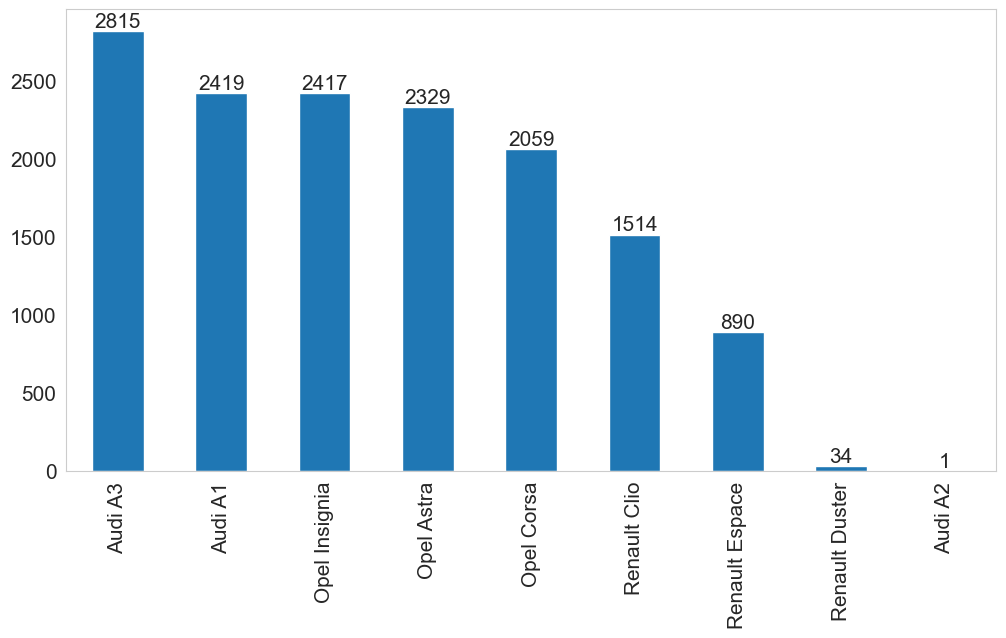

In [12]:
g = df.make_model.value_counts().plot.bar()
g.bar_label(g.containers[0]);

In [13]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
2419,Audi A2,Off-Road,28200,26166.0,Employee's car,1,Metallic,5.0,Manual,1598.0,1734.0,front,Diesel (Particulate Filter),120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.0,1.0,85.0,12.0,Cloth,4.9


In [14]:
df.drop(index=df[df.make_model=="Audi A2"].index, inplace =True)

In [15]:
df.shape

(14477, 24)

<AxesSubplot:xlabel='price', ylabel='Count'>

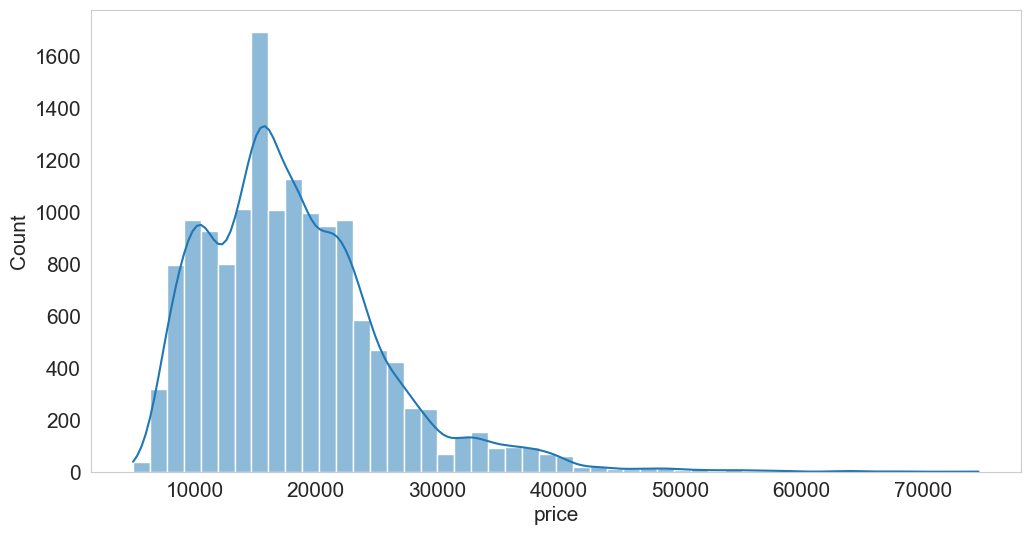

In [16]:
sns.histplot(df['price'], bins=50, kde=True)

In [20]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
])

,skew,kurtosis
price,1.257097,3.058166
km,1.658665,3.071558
inspection_new,-0.688032,-1.526823
nr_of_seats,-0.131846,14.767464
displacement_cc,-0.069870,-0.293110
weight_kg,1.080997,1.201250
co_2_emission,0.392158,-0.605338
gears,0.422295,-0.101772
age,0.160315,-1.305615
hp_kw,1.335504,4.854531


In [21]:
stats.describe(df['price'])

DescribeResult(nobs=14477, minmax=(4950, 74600), mean=18132.81418802238, variance=55108264.12394071, skewness=1.256966267780525, kurtosis=3.056695732931841)

In [23]:
d = stats.describe(df['price'])._asdict()
d

{'nobs': 14477,
 'minmax': (4950, 74600),
 'mean': 18132.81418802238,
 'variance': 55108264.12394071,
 'skewness': 1.256966267780525,
 'kurtosis': 3.056695732931841}

In [24]:
pd.DataFrame(d, columns=d.keys())

,nobs,minmax,mean,variance,skewness,kurtosis
0,14477,4950,18132.814188,5.510826e+07,1.256966,3.056696
1,14477,74600,18132.814188,5.510826e+07,1.256966,3.056696


In [26]:
pd.DataFrame.from_dict(stats.describe(df['price'])._asdict(), orient='index')

,0
nobs,14477
minmax,"(4950, 74600)"
mean,18132.814188
variance,55108264.123941
skewness,1.256966
kurtosis,3.056696


### Feature Engineering - Numeric Column

In [29]:
numbers = df.select_dtypes("number").columns
df[numbers].describe().T

,count,mean,std,min,25%,50%,75%,max
price,14477.0,18132.814188,7423.494064,4950.0,12950.0,16977.0,21900.0,74600.0
km,14477.0,32186.667783,36788.405126,0.0,3990.0,20600.0,46313.0,317000.0
inspection_new,14477.0,0.662637,0.472826,0.0,0.0,1.0,1.0,1.0
nr_of_seats,14477.0,4.954134,0.490554,2.0,5.0,5.0,5.0,7.0
displacement_cc,14477.0,1428.935242,279.517476,890.0,1229.0,1461.0,1598.0,2480.0
weight_kg,14477.0,1348.258893,209.367664,840.0,1165.0,1280.0,1472.0,2471.0
co_2_emission,14477.0,117.061615,16.653406,80.0,104.0,116.0,128.0,164.0
gears,14477.0,5.888651,0.710834,5.0,5.0,6.0,6.0,9.0
age,14477.0,1.414140,1.105132,0.0,0.0,1.0,2.0,3.0
hp_kw,14477.0,88.584168,26.519228,51.0,66.0,85.0,103.0,294.0


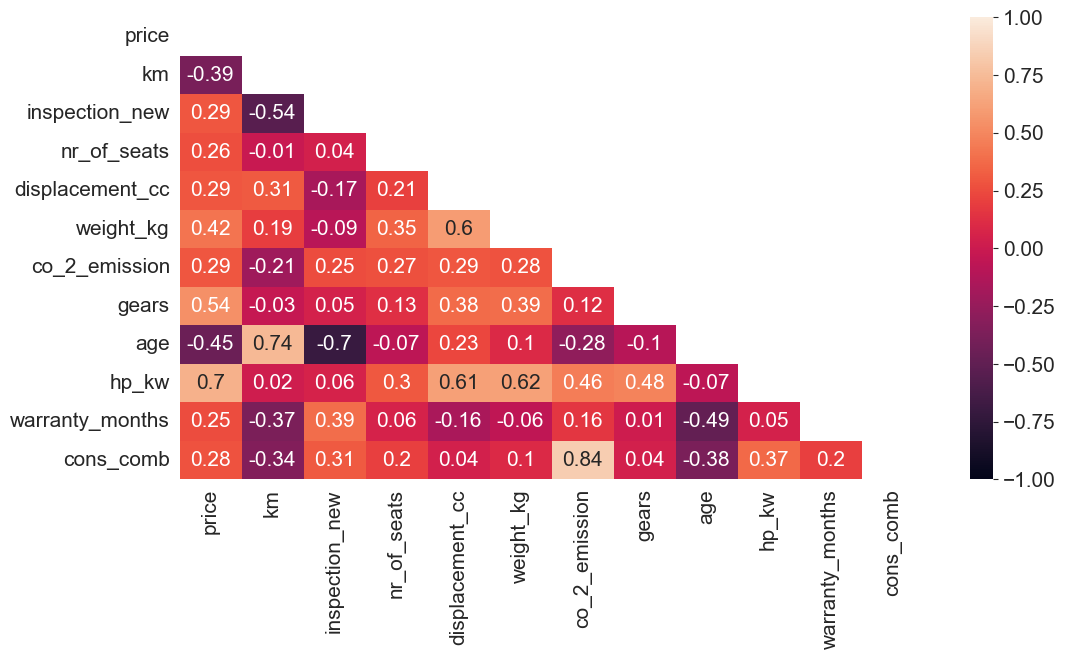

In [31]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

### `Multicolinarity` Check Colorized Correlation

In [32]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

In [33]:
def check_multicolinarity(data, upper=0.9):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val)>=upper and val<1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=upper and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df, upper=0.7)

Multicolinarity Data (5, 5)


,km,inspection_new,co_2_emission,age,cons_comb
km,nan,nan,nan,0.740970,nan
inspection_new,nan,nan,nan,-0.702100,nan
co_2_emission,nan,nan,nan,nan,0.842929
age,0.740970,-0.702100,nan,nan,nan
cons_comb,nan,nan,0.842929,nan,nan


### Check Target Feature

<AxesSubplot:xlabel='price'>

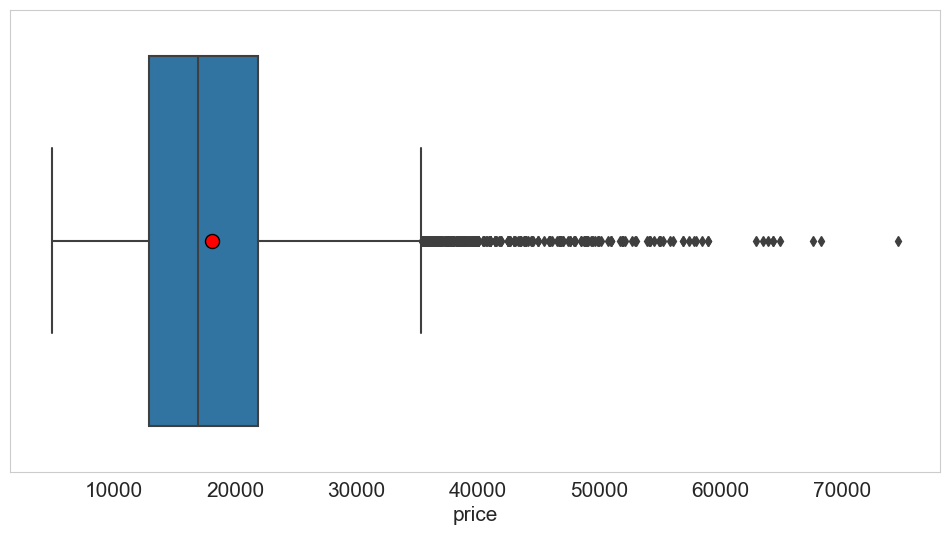

In [34]:
sns.boxplot(df.price)

In [35]:
df.groupby('make_model')[['price']].describe().T

make_model        Audi A1       Audi A3    Opel Astra    Opel Corsa  \
price count   2419.000000   2815.000000   2329.000000   2059.000000   
      mean   18824.266226  21040.355950  15971.878918  11104.230695   
      std     4494.313009   5084.676155   5021.903624   2995.142415   
      min     8999.000000   5555.000000   6000.000000   4950.000000   
      25%    15600.000000  17915.000000  12460.000000   8700.000000   
      50%    17880.000000  20900.000000  15390.000000  10499.000000   
      75%    21900.000000  23490.000000  18000.000000  13590.000000   
      max    37900.000000  74600.000000  39433.000000  18622.000000   

make_model   Opel Insignia  Renault Clio  Renault Duster  Renault Espace  
price count    2417.000000   1514.000000       34.000000      890.000000  
      mean    21564.633016  11987.845443    13230.176471    30293.247191  
      std      7792.958772   4252.654023     1622.404678     8822.578258  
      min      8290.000000   5445.000000    10850.000000    12614.000000  
      25%     15600.000000   9268.750000    11925.000000    23912.500000  
      50%     19990.000000  10595.500000    13189.000000    28990.000000  
      75%     24470.000000  14493.750000    14399.000000    35261.500000  
      max     52120.000000  31500.000000    16033.000000    68320.000000

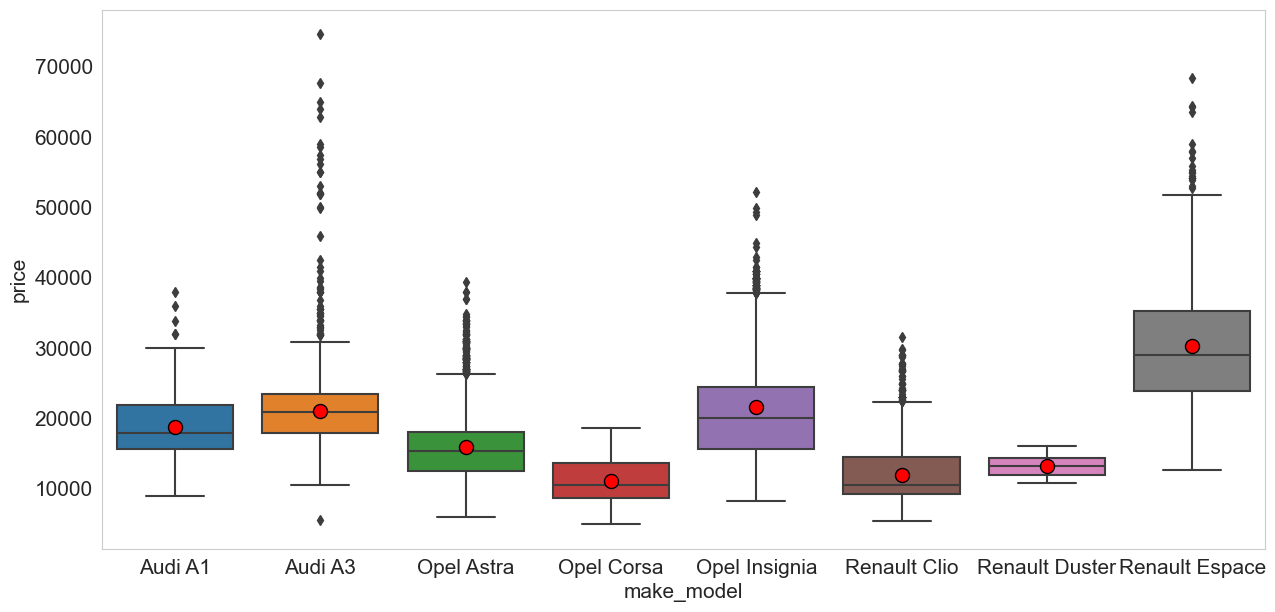

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

### Check Count Outliers

In [37]:
df[df["make_model"]== "Audi A1"]["price"].sort_values()

25      8999
61      9950
63     10000
62     10300
64     10490
       ...  
650    31990
647    32000
673    33900
672    35900
653    37900
Name: price, Length: 2419, dtype: int64

In [38]:
total_outliers = []

for model in df["make_model"].unique():
    
    car_prices = df[df["make_model"]==model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 57   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 130  ,           The rate of outliers : 0.056
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 113  ,           The rate of outliers : 0.047
 The count of outlier for Renault Clio    : 61   ,           The rate of outliers : 0.04
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 19   ,           The rate of outliers : 0.021

Total_outliers :  385 The rate of total outliers : 0.027


# 2. Data Pre-Processing

## Import Libraries

In [41]:
# !pip install -U scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

# UnSupervised
from sklearn.cluster import KMeans
# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

In [42]:
# !pip install yellowbrick
# yellowbrick library for visualizing the model performance

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [43]:
X = df.drop(columns='price')
y = df['price']

## Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

### `get_dummies` for X_train and X_test - for data separated by ','
- if data separated by ',', we will get dummy.

In [48]:
from sklearn.model_selection import train_test_split

def trans_1(X, y, test_size = 0.2, random_state=101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    X_test.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

In [49]:
from sklearn.model_selection import train_test_split

def trans_1_get_dummies(X, y, nunique=10, test_size = 0.2, random_state=101, df=X): 
    '''Object column X if you change X, specify it in parameter'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    df_object = df.select_dtypes(include ="O")
    dummy_col = df_object.nunique()[df_object.nunique()>nunique].index
    prefix = [i[0]+i.split('_')[1][0]+'_' if '_' in i else i[:2]+'_' for i in dummy_col]
    
    for col, pre in zip(dummy_col, prefix):
        X_train = X_train.join(X_train[col].str.get_dummies(sep = ",").add_prefix(pre))
        X_test = X_test.join(X_test[col].str.get_dummies(sep = ",").add_prefix(pre))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    X_train.drop(columns=dummy_col, inplace = True)
    X_test.drop(columns=dummy_col, inplace = True)
    
    return X_train, X_test, y_train, y_test

In [50]:
# check high nunique data separated by ','
X.select_dtypes(include ="O").nunique()

make_model                8
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
comfort_convenience    6196
entertainment_media     346
extras                  659
safety_security        4442
upholstery_type           6
dtype: int64

In [51]:
X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y, nunique=10)

In [52]:
# get_dummies applied for comma separated data in columns
X_train.select_dtypes('O').nunique()

make_model         8
body_type          8
type               5
paint_type         3
gearing_type       3
drive_chain        3
fuel               6
upholstery_type    6
dtype: int64

### `OneHotEncoder` for X_train and X_test

In [53]:
from sklearn.preprocessing import OneHotEncoder

def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    return X_train, X_test

In [54]:
from sklearn.preprocessing import OneHotEncoder

def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [55]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [56]:
X_train.shape, X_test.shape

((11581, 146), (2896, 146))

In [57]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11581.0,0.167861,0.373759,0.0,0.0,0.0,0.0,1.0
make_model_Audi A3,11581.0,0.192989,0.394661,0.0,0.0,0.0,0.0,1.0
make_model_Opel Astra,11581.0,0.157758,0.364530,0.0,0.0,0.0,0.0,1.0
make_model_Opel Corsa,11581.0,0.141352,0.348400,0.0,0.0,0.0,0.0,1.0
make_model_Opel Insignia,11581.0,0.170279,0.375894,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ss_Side airbag,11581.0,0.888352,0.314947,0.0,1.0,1.0,1.0,1.0
ss_Tire pressure monitoring system,11581.0,0.702271,0.457279,0.0,0.0,1.0,1.0,1.0
ss_Traction control,11581.0,0.747431,0.434504,0.0,0.0,1.0,1.0,1.0
ss_Traffic sign recognition,11581.0,0.135567,0.342343,0.0,0.0,0.0,0.0,1.0


In [58]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,2896.0,0.164019,0.370357,0.0,0.0,0.0,0.0,1.0
make_model_Audi A3,2896.0,0.200276,0.400276,0.0,0.0,0.0,0.0,1.0
make_model_Opel Astra,2896.0,0.173343,0.378609,0.0,0.0,0.0,0.0,1.0
make_model_Opel Corsa,2896.0,0.145718,0.352884,0.0,0.0,0.0,0.0,1.0
make_model_Opel Insignia,2896.0,0.153660,0.360685,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ss_Side airbag,2896.0,0.897099,0.303881,0.0,1.0,1.0,1.0,1.0
ss_Tire pressure monitoring system,2896.0,0.708564,0.454503,0.0,0.0,1.0,1.0,1.0
ss_Traction control,2896.0,0.755870,0.429644,0.0,1.0,1.0,1.0,1.0
ss_Traffic sign recognition,2896.0,0.133978,0.340687,0.0,0.0,0.0,0.0,1.0


## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 

# Use train - calc mean and sd
scaler.fit(X_train)

# Use scaler calc scaled data
# if you don't use pipeline, you can use scaled data directly
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [61]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11581.0,0.167861,0.373759,0.0,0.0,0.0,0.0,1.0
make_model_Audi A3,11581.0,0.192989,0.394661,0.0,0.0,0.0,0.0,1.0
make_model_Opel Astra,11581.0,0.157758,0.364530,0.0,0.0,0.0,0.0,1.0
make_model_Opel Corsa,11581.0,0.141352,0.348400,0.0,0.0,0.0,0.0,1.0
make_model_Opel Insignia,11581.0,0.170279,0.375894,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ss_Side airbag,11581.0,0.888352,0.314947,0.0,1.0,1.0,1.0,1.0
ss_Tire pressure monitoring system,11581.0,0.702271,0.457279,0.0,0.0,1.0,1.0,1.0
ss_Traction control,11581.0,0.747431,0.434504,0.0,0.0,1.0,1.0,1.0
ss_Traffic sign recognition,11581.0,0.135567,0.342343,0.0,0.0,0.0,0.0,1.0


In [63]:
# check X_test_scaled
# pd.DataFrame(X_test_scaled, columns=X_test.columns).describe().T

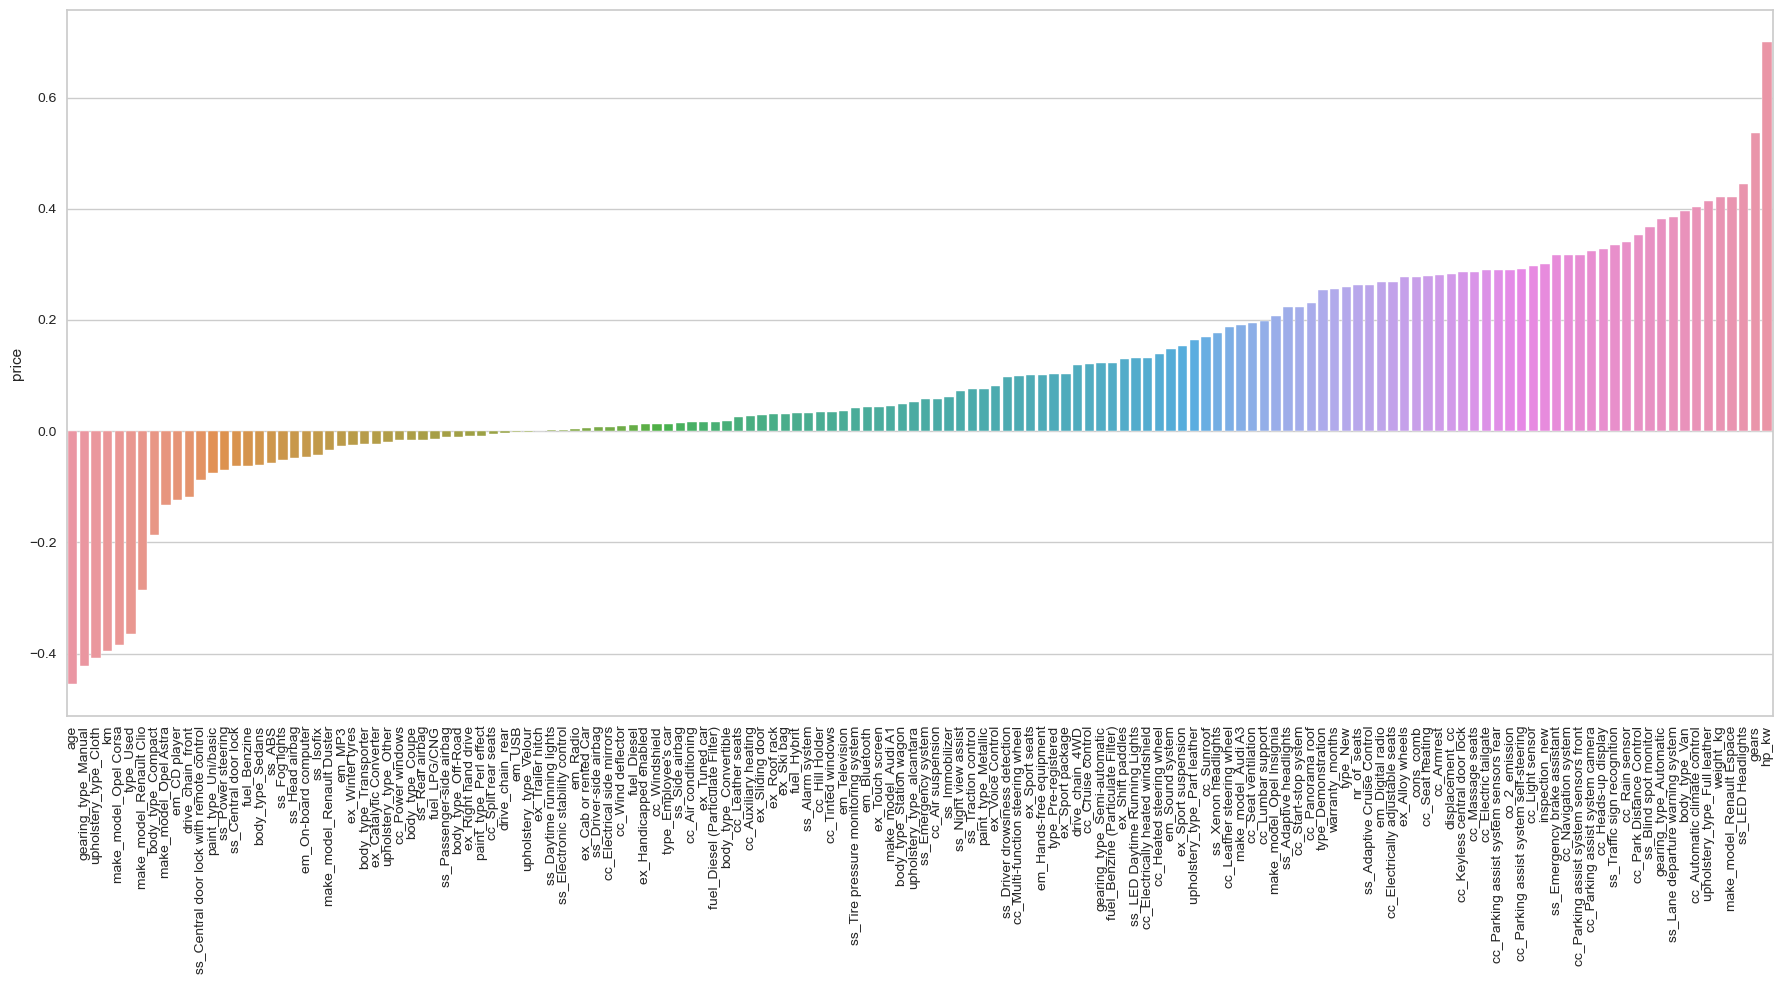

In [65]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

plt.figure(figsize=(18,10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)

plt.xticks(rotation=90)
plt.tight_layout();

# 3. Implement `Linear` Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## Linear Model Fitting and Predicting with `Scale - without Pipeline`
- Can use Scaled `X_train_scaled, X_test_scaled` or not Scaled `X_train, X_test` Datas

In [66]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() 

lin_model.fit(X_train_scaled, y_train)

y_pred = lin_model.predict(X_test_scaled)
y_train_pred = lin_model.predict(X_train_scaled)

In [67]:
def check_pred_data_describe(y_pred, y_train_pred):
    test = pd.DataFrame(y_pred, columns=['y_pred']).describe().T
    train = pd.DataFrame(y_train_pred, columns=['y_train_pred']).describe().T
    return pd.concat([test, train])

In [68]:
# pred data
check_pred_data_describe(y_pred, y_train_pred)

,count,mean,std,min,25%,50%,75%,max
y_pred,2896.0,18178.118094,6988.580578,346.0,13435.5,17641.0,22556.0,49624.0
y_train_pred,11581.0,18125.680338,7029.639206,-2458.0,13318.0,17644.0,22420.0,51624.0


In [69]:
# actual data vs pred data cross check
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,2896.0,18160.182320,7385.653843,5450.0,13000.0,16980.0,21900.0,68320.0
price,11581.0,18125.970383,7433.228386,4950.0,12910.0,16960.0,21920.0,74600.0


### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# same train_val function
def get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, model_name="linear"):      
    train = pd.Series({
            "R2"   : r2_score(y_train, y_train_pred),
            "MAE"  : mean_absolute_error(y_train, y_train_pred),
            "MSE"  : mean_squared_error(y_train, y_train_pred),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred),
            "MAE"  : mean_absolute_error(y_test, y_pred),
            "MSE"  : mean_squared_error(y_test, y_pred),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
#     # join (left join by default)
#     scores2 = train.join(test)
#     # concat (outer join by default)
#     scores3 = pd.concat([train, test], axis=1)
#     # append not recommended - use concat
#     scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

In [71]:
# Evaluate the result. Overfitting?
ls = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear")
ls

0           linear              
      linear_train   linear_test
R2    8.895963e-01  8.801484e-01
MAE   1.743480e+03  1.754717e+03
MSE   6.099597e+06  6.535391e+06
RMSE  2.469736e+03  2.556441e+03

In [72]:
# check
2438.579185/y.mean()

0.13448431995794685

### Adjusted R2 Score

In [73]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [74]:
y_pred_adj = lin_model.predict(X_test)

In [75]:
adj_r2(y_test, y_pred_adj, X)

-7378421065.491198

### Linear Model Cross Validation

In [78]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [79]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train_scaled, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)

In [81]:
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm.iloc[:, 2:].mean()

test_r2                            -7.614350e+18
test_neg_mean_absolute_error       -2.735076e+11
test_neg_mean_squared_error        -4.331292e+26
test_neg_root_mean_squared_error   -9.307301e+12
dtype: float64

In [82]:
# crosscheck before-after
ls

0           linear              
      linear_train   linear_test
R2    8.895963e-01  8.801484e-01
MAE   1.743480e+03  1.754717e+03
MSE   6.099597e+06  6.535391e+06
RMSE  2.469736e+03  2.556441e+03

#### Train Residual Mean check percent - Cross Validation RMSE

In [83]:
def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])

In [84]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, y_train_pred)), 
    df_scores_lm['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),1.362026e-01
CV RMSE percent(%),-5.132850e+08


### Coefficient - Slope Calculate 

In [85]:
def get_coeff_intercept(coeff_, intercept_, model_name='linear', columns=X_train.columns):
    coefficients = pd.DataFrame(coeff_, columns = [f'Coefficient_{model_name}'], index=columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept_}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [86]:
# Calc Slope
lm_df = get_coeff_intercept(
    lin_model.coef_, 
    lin_model.intercept_
)
lm_df

,Coefficient_linear
make_model_Audi A1,-1.745909e+16
make_model_Audi A3,-1.745909e+16
make_model_Opel Astra,-1.745909e+16
make_model_Opel Corsa,-1.745909e+16
make_model_Opel Insignia,-1.745909e+16
...,...
ss_Tire pressure monitoring system,3.650000e+01
ss_Traction control,2.215625e+02
ss_Traffic sign recognition,-9.200000e+01
ss_Xenon headlights,-3.340000e+02


### **Result:________**

- R2 score is high but
- R2 and RMSE check cross validation not not suitable all time, because of dummy column count

## Calculate Residuals & Visually Compare Residuals

Why do we use the least squares error method to find the regression line that best fits the data?

In [87]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_pred-y_test})
# which datas have most error
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
14392,68320,41020.0,-27300.0
13902,46895,27838.0,-19057.0
9945,11600,28954.0,17354.0
11766,48950,32114.0,-16836.0
2956,5555,22190.0,16635.0


In [88]:
# check Residual
df_comparing.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,2896.0,18160.182320,7385.653843,5450.0,13000.00,16980.0,21900.0,68320.0
Prediction,2896.0,18178.118094,6988.580578,346.0,13435.50,17641.0,22556.0,49624.0
Residual,2896.0,17.935773,2556.819700,-27300.0,-1162.25,96.0,1380.5,17354.0


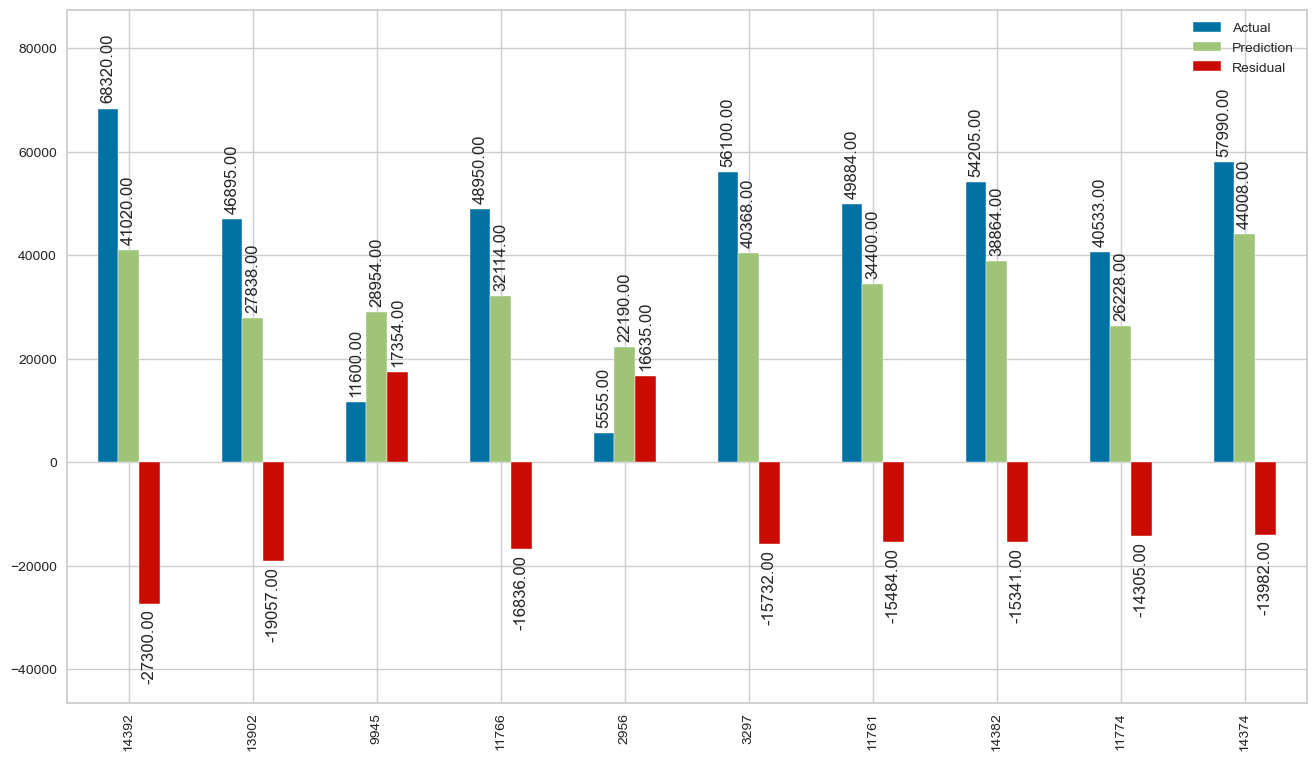

In [90]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

### Check datas have `most Residual-Error`

In [91]:
# indexes which datas have most error
index = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head().index

In [92]:
# check datas have most error
df.loc[index]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
14392,Renault Espace,Van,68320,4307.0,Demonstration,1,Metallic,4.0,Automatic,1598.0,1734.0,front,Diesel (Particulate Filter),120.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,0.0,118.0,24.000000,Full leather,6.500000
13902,Renault Espace,Sedans,46895,55000.0,New,0,Metallic,7.0,Manual,1997.0,2044.0,front,Diesel (Particulate Filter),139.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,3.0,147.0,12.000000,Part leather,5.400000
9945,Opel Insignia,Sedans,11600,68000.0,Used,0,Metallic,5.0,Automatic,1998.0,1440.0,front,Benzine,138.0,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,On-board computer","Alloy wheels,Roof rack,Ski bag","ABS,Central door lock with remote control,Driv...",6.0,2.0,191.0,12.000000,Full leather,8.600000
11766,Opel Insignia,Sedans,48950,100.0,New,1,Metallic,5.0,Manual,1956.0,1503.0,4WD,Diesel (Particulate Filter),145.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Central door lock,...",6.0,0.0,125.0,27.428571,Full leather,4.616667
2956,Audi A3,Station wagon,5555,5558.0,Used,1,Metallic,5.0,Manual,1968.0,1465.0,front,Diesel (Particulate Filter),127.0,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.0,1.0,110.0,27.000000,Cloth,4.800000


### Check Residuals - Scatterplot

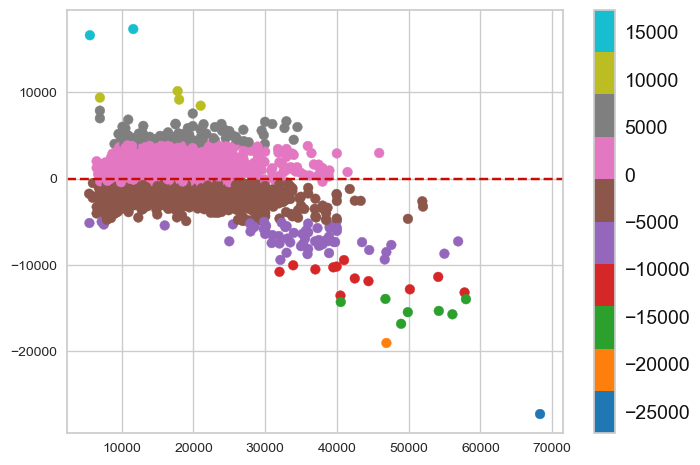

In [93]:
# Residuals scatterplot
plt.scatter(x=y_test, y=(y_pred-y_test), c=(y_pred-y_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - Probplot

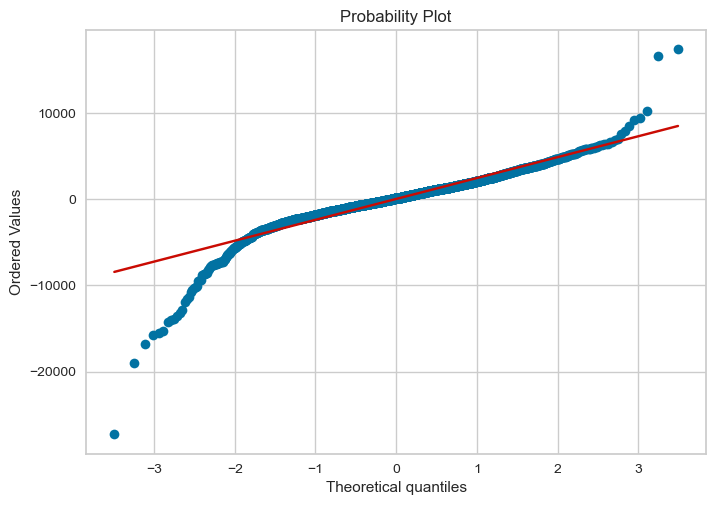

In [94]:
stats.probplot((y_pred-y_test), dist ="norm", plot =plt);

In [95]:
stats.describe((y_pred-y_test))

DescribeResult(nobs=2896, minmax=(-27300.0, 17354.0), mean=17.935773480662984, variance=6537326.976184409, skewness=-1.3204286386877768, kurtosis=11.304811127969506)

In [96]:
pd.DataFrame.from_dict(stats.describe((y_pred-y_test))._asdict(), orient='index')

,0
nobs,2896
minmax,"(-27300.0, 17354.0)"
mean,17.935773
variance,6537326.976184
skewness,-1.320429
kurtosis,11.304811


### Check Residuals - ResidualsPlot

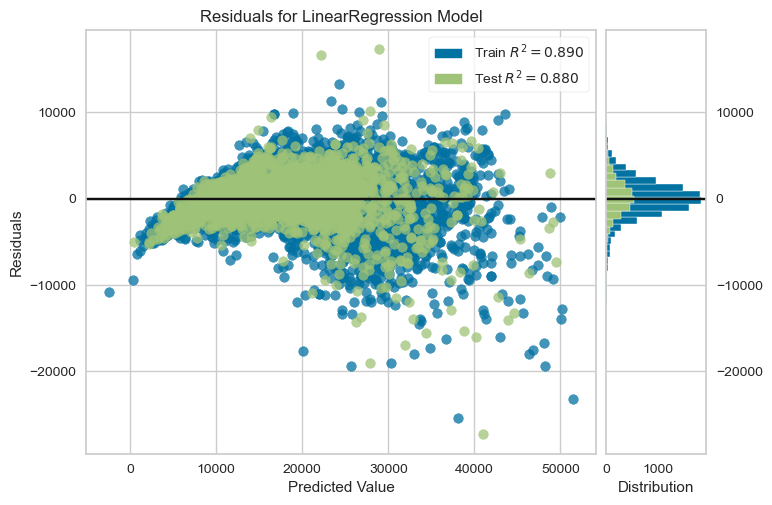

In [97]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

### Check Residuals - PredictionError

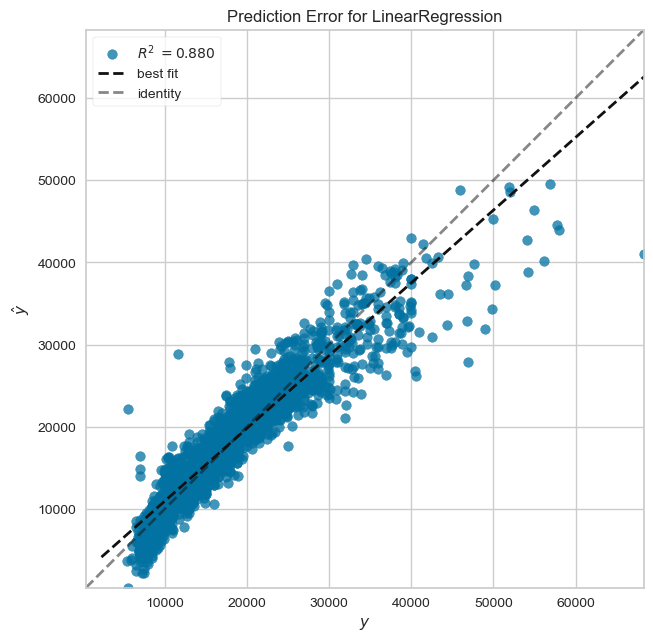

In [98]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

## `Dropping outliers` that worsen my predictions from the dataset - `without Scale - without Pipeline`

In [99]:
df2 = df.copy()

for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    
df2.head(2)

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.0,Used,1,Metallic,5.0,Automatic,1422.0,1220.0,front,Diesel (Particulate Filter),99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,3.0,66.0,12.000000,Cloth,3.8
1,Audi A1,Sedans,14500,80000.0,Used,0,Metallic,4.0,Automatic,1798.0,1255.0,front,Benzine,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,2.0,141.0,15.646154,Cloth,5.6


In [100]:
df.shape, df2.shape

((14477, 24), (14092, 24))

In [101]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y)
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

# if you don't use pipeline, you can use scaled data directly
scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

lin_model2 = LinearRegression()
lin_model2.fit(X_train,y_train)
y_pred = lin_model2.predict(X_test)
y_train_pred = lin_model2.predict(X_train)

ls2 = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear2")
ls2

0          linear2              
     linear2_train  linear2_test
R2    8.983190e-01  8.920657e-01
MAE   1.545476e+03  1.523499e+03
MSE   4.735187e+06  4.608128e+06
RMSE  2.176049e+03  2.146655e+03

In [102]:
y_pred_adj = lin_model2.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.891889190219525

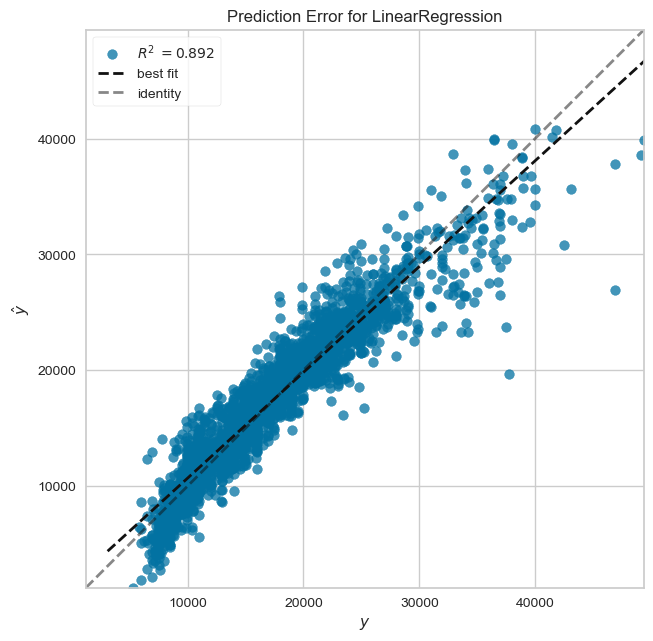

In [103]:
model = LinearRegression()

visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

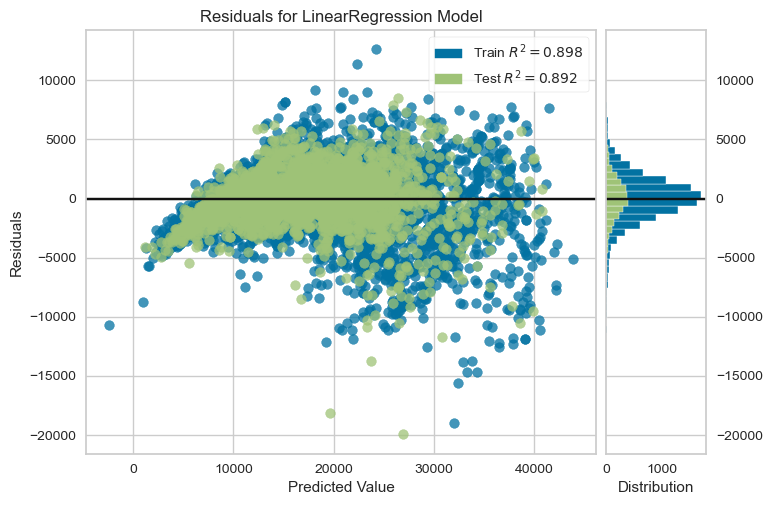

In [104]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

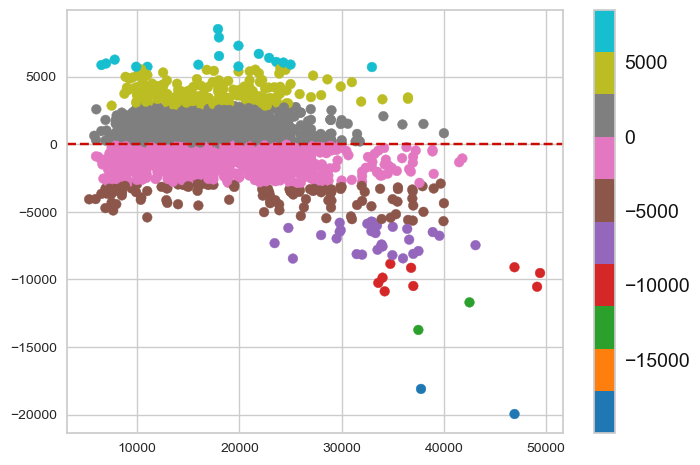

In [105]:
# Residuals scatterplot
plt.scatter(x=y_test, y=(y_pred-y_test), c=(y_pred-y_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

In [106]:
model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)

In [108]:
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm.iloc[:, 2:].mean()

test_r2                             8.944308e-01
test_neg_mean_absolute_error       -1.570743e+03
test_neg_mean_squared_error        -4.918634e+06
test_neg_root_mean_squared_error   -2.216468e+03
dtype: float64

In [110]:
ls2

0          linear2              
     linear2_train  linear2_test
R2    8.983190e-01  8.920657e-01
MAE   1.545476e+03  1.523499e+03
MSE   4.735187e+06  4.608128e+06
RMSE  2.176049e+03  2.146655e+03

In [111]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_pred-y_test})
# which datas have most error
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
13902,46895,26934.676988,-19960.323012
11458,37750,19646.080676,-18103.919324
11784,37490,23751.192221,-13738.807779
14452,42490,30790.372480,-11699.627520
11847,34200,23316.310743,-10883.689257


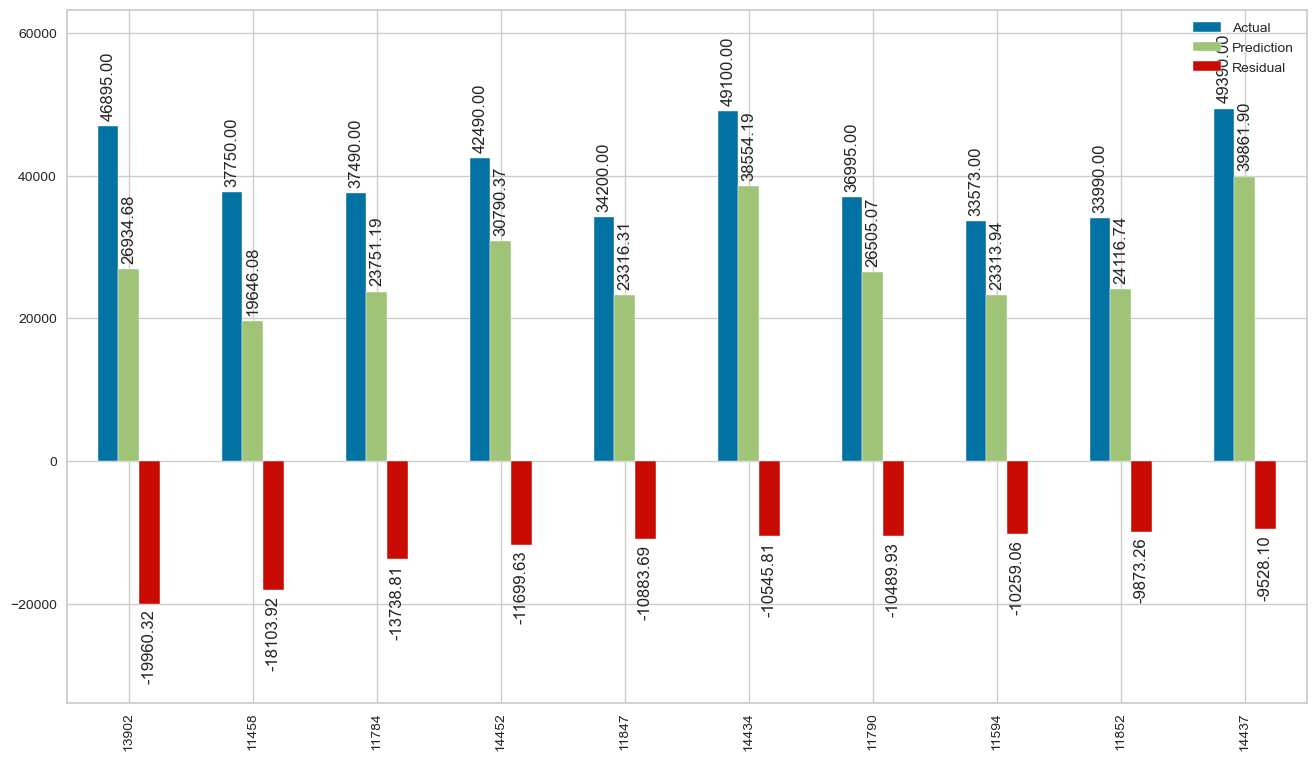

In [112]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

In [113]:
# Calc Slope
lm_df2 = get_coeff_intercept(
    lin_model2.coef_, 
    lin_model2.intercept_
)
lm_df2

,Coefficient_linear
make_model_Audi A1,2640.328676
make_model_Audi A3,3955.581452
make_model_Opel Astra,-1257.794552
make_model_Opel Corsa,-3288.405697
make_model_Opel Insignia,1924.038004
...,...
ss_Tire pressure monitoring system,-133.275837
ss_Traction control,140.322734
ss_Traffic sign recognition,-52.092355
ss_Xenon headlights,-278.275255


## **Result:________**

- We used not scaled data because of the dummy features
- When we delete outliers by car model, our minimum and maximum residuals are reduced and our scores were improved.

# 4. Implement `Ridge` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value. 

In [116]:
from sklearn.linear_model import Ridge

scaler = MinMaxScaler() 
ridge_model = Ridge(alpha=1, random_state=42) 

# pipeline is used to combine scaler and model
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [117]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [118]:
rs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

0            ridge              
       ridge_train    ridge_test
R2    8.982934e-01  8.921045e-01
MAE   1.545017e+03  1.522472e+03
MSE   4.736381e+06  4.606469e+06
RMSE  2.176323e+03  2.146269e+03

In [119]:
pd.concat([ls, rs], axis = 1)

0           linear                       ridge              
      linear_train   linear_test   ridge_train    ridge_test
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03

In [120]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state             42
solver                 auto
tol                   0.001
dtype: object

## Ridge Regression Check Cross Validation with alpha : 1

In [121]:
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
scores = cross_validate(
    pipe_ridge, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [122]:
df_scores_ridge = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_ridge

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.059082,0.011440,0.896715,-1578.203591,-4.840354e+06,-2200.080561
1,0.063773,0.012730,0.893006,-1601.915843,-4.949989e+06,-2224.857052
2,0.060704,0.012467,0.884058,-1607.946292,-5.496211e+06,-2344.399939
3,0.070991,0.010576,0.900121,-1499.129743,-4.452789e+06,-2110.163274
4,0.069211,0.013657,0.899066,-1558.257059,-4.815871e+06,-2194.509230


In [123]:
df_scores_ridge.iloc[:, 2:].mean()

test_r2                             8.945933e-01
test_neg_mean_absolute_error       -1.569091e+03
test_neg_mean_squared_error        -4.911043e+06
test_neg_root_mean_squared_error   -2.214802e+03
dtype: float64

In [124]:
# crosscheck before-after
rs

0            ridge              
       ridge_train    ridge_test
R2    8.982934e-01  8.921045e-01
MAE   1.545017e+03  1.522472e+03
MSE   4.736381e+06  4.606469e+06
RMSE  2.176323e+03  2.146269e+03

In [125]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}'
)
rm_df

,Coefficient_ridge_alpha_1
make_model_Audi A1,2526.015248
make_model_Audi A3,3836.524598
make_model_Opel Astra,-1367.890759
make_model_Opel Corsa,-3406.344705
make_model_Opel Insignia,1814.920608
...,...
ss_Tire pressure monitoring system,-133.882215
ss_Traction control,141.499836
ss_Traffic sign recognition,-47.890841
ss_Xenon headlights,-277.329992


In [126]:
pd.concat([lm_df, rm_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1
make_model_Audi A1,-1.745909e+16,2526.015248
make_model_Audi A3,-1.745909e+16,3836.524598
make_model_Opel Astra,-1.745909e+16,-1367.890759
make_model_Opel Corsa,-1.745909e+16,-3406.344705
make_model_Opel Insignia,-1.745909e+16,1814.920608
...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215
ss_Traction control,2.215625e+02,141.499836
ss_Traffic sign recognition,-9.200000e+01,-47.890841
ss_Xenon headlights,-3.340000e+02,-277.329992


##  Ridge Regression Choosing Alpha value

In [128]:
from sklearn.linear_model import RidgeCV

# define alpha_space (0.1, 1, 10)
alpha_space = np.linspace(1.5, 2.5, 21)
alpha_space

# will be used in pipeline later
ridgecv_model = RidgeCV(
    alphas=alpha_space, 
    scoring= "neg_root_mean_squared_error",
    cv = 10
)
# pipeline is used to combine scaler and model
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
])
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ,
       2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [129]:
pipe_ridgecv["ridgecv"].alpha_

2.0

In [130]:
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)

In [131]:
rcs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

0          ridge_cv              
     ridge_cv_train ridge_cv_test
R2     8.982337e-01  8.920832e-01
MAE    1.544859e+03  1.521800e+03
MSE    4.739161e+06  4.607379e+06
RMSE   2.176962e+03  2.146481e+03

In [132]:
pd.concat([ls, rs, rcs], axis = 1)

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                   
     ridge_cv_test  
R2    8.920832e-01  
MAE   1.521800e+03  
MSE   4.607379e+06  
RMSE  2.146481e+03

In [133]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                                                False
alphas              [1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1...
cv                                                                 10
fit_intercept                                                    True
gcv_mode                                                         None
normalize                                                  deprecated
scoring                                   neg_root_mean_squared_error
store_cv_values                                                 False
dtype: object

In [134]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}'
)
rcm_df

,Coefficient_ridgecv_alpha_2.0
make_model_Audi A1,2441.037941
make_model_Audi A3,3746.826663
make_model_Opel Astra,-1448.657812
make_model_Opel Corsa,-3498.355168
make_model_Opel Insignia,1733.164519
...,...
ss_Tire pressure monitoring system,-133.904053
ss_Traction control,142.888420
ss_Traffic sign recognition,-44.506251
ss_Xenon headlights,-276.168631


In [135]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0
make_model_Audi A1,-1.745909e+16,2526.015248,2441.037941
make_model_Audi A3,-1.745909e+16,3836.524598,3746.826663
make_model_Opel Astra,-1.745909e+16,-1367.890759,-1448.657812
make_model_Opel Corsa,-1.745909e+16,-3406.344705,-3498.355168
make_model_Opel Insignia,-1.745909e+16,1814.920608,1733.164519
...,...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215,-133.904053
ss_Traction control,2.215625e+02,141.499836,142.888420
ss_Traffic sign recognition,-9.200000e+01,-47.890841,-44.506251
ss_Xenon headlights,-3.340000e+02,-277.329992,-276.168631


## **Result:________**

- 

# 5. Implement `Lasso` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [137]:
from sklearn.linear_model import Lasso, LassoCV

scaler = MinMaxScaler() 
lasso_model = Lasso(alpha=1, random_state=42)

# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [138]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [139]:
lss = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

0            lasso              
       lasso_train    lasso_test
R2    8.980160e-01  8.922592e-01
MAE   1.546071e+03  1.519234e+03
MSE   4.749296e+06  4.599865e+06
RMSE  2.179288e+03  2.144730e+03

In [140]:
pd.concat([ls, rs, rcs, lss], axis = 1)

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                          lasso                
     ridge_cv_test   lasso_train    lasso_test  
R2    8.920832e-01  8.980160e-01  8.922592e-01  
MAE   1.521800e+03  1.546071e+03  1.519234e+03  
MSE   4.607379e+06  4.749296e+06  4.599865e+06  
RMSE  2.146481e+03  2.179288e+03  2.144730e+03

In [141]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                  0.0001
warm_start            False
dtype: object

## Lasso Regression Cross Validation with Default Alpha : 1

In [144]:
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])

scores = cross_validate(
    pipe_lasso, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores_lasso = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lasso

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.717100,0.012567,0.897529,-1572.879225,-4.802214e+06,-2191.395443
1,0.658399,0.015123,0.893109,-1601.401995,-4.945211e+06,-2223.783083
2,0.650616,0.015667,0.884581,-1604.659396,-5.471407e+06,-2339.103845
3,0.685160,0.013534,0.900096,-1500.389192,-4.453907e+06,-2110.428092
4,0.605773,0.011448,0.898836,-1559.188208,-4.826843e+06,-2197.007675


In [145]:
df_scores_lasso.iloc[:, 2:].mean()

test_r2                             8.948303e-01
test_neg_mean_absolute_error       -1.567704e+03
test_neg_mean_squared_error        -4.899916e+06
test_neg_root_mean_squared_error   -2.212344e+03
dtype: float64

In [146]:
# crosscheck before-after
lss

0            lasso              
       lasso_train    lasso_test
R2    8.980160e-01  8.922592e-01
MAE   1.546071e+03  1.519234e+03
MSE   4.749296e+06  4.599865e+06
RMSE  2.179288e+03  2.144730e+03

In [147]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}'
)
lsm_df

,Coefficient_lasso_alpha_1
make_model_Audi A1,2314.937217
make_model_Audi A3,3643.995256
make_model_Opel Astra,-1566.065330
make_model_Opel Corsa,-3508.087222
make_model_Opel Insignia,1584.876728
...,...
ss_Tire pressure monitoring system,-121.955420
ss_Traction control,139.411788
ss_Traffic sign recognition,-3.067062
ss_Xenon headlights,-267.213706


In [148]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1
make_model_Audi A1,-1.745909e+16,2526.015248,2441.037941,2314.937217
make_model_Audi A3,-1.745909e+16,3836.524598,3746.826663,3643.995256
make_model_Opel Astra,-1.745909e+16,-1367.890759,-1448.657812,-1566.065330
make_model_Opel Corsa,-1.745909e+16,-3406.344705,-3498.355168,-3508.087222
make_model_Opel Insignia,-1.745909e+16,1814.920608,1733.164519,1584.876728
...,...,...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215,-133.904053,-121.955420
ss_Traction control,2.215625e+02,141.499836,142.888420,139.411788
ss_Traffic sign recognition,-9.200000e+01,-47.890841,-44.506251,-3.067062
ss_Xenon headlights,-3.340000e+02,-277.329992,-276.168631,-267.213706


## Lasso Regression choosing  best Alpha value

In [149]:
# define alpha_space (0.1, 1, 10)
alpha_space = np.linspace(0.75, 0.9, 26)
alpha_space

# will be used in pipeline later
lassocv_model = LassoCV(
    alphas=alpha_space, 
    max_iter=100000, 
    cv=10, 
    random_state=42
)
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.75 , 0.756, 0.762, 0.768, 0.774, 0.78 , 0.786, 0.792, 0.798,
       0.804, 0.81 , 0.816, 0.822, 0.828, 0.834, 0.84 , 0.846, 0.852,
       0.858, 0.864, 0.87 , 0.876, 0.882, 0.888, 0.894, 0.9  ]),
                         cv=10, max_iter=100000, random_state=42))])

In [150]:
pipe_lassocv["lassocv"].alpha_

0.8220000000000001

In [151]:
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [152]:
lcs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

0          lasso_cv              
     lasso_cv_train lasso_cv_test
R2     8.980868e-01  8.922810e-01
MAE    1.545736e+03  1.519542e+03
MSE    4.746001e+06  4.598932e+06
RMSE   2.178532e+03  2.144512e+03

In [153]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                          lasso                     lasso_cv                
     ridge_cv_test   lasso_train    lasso_test lasso_cv_train lasso_cv_test  
R2    8.920832e-01  8.980160e-01  8.922592e-01   8.980868e-01  8.922810e-01  
MAE   1.521800e+03  1.546071e+03  1.519234e+03   1.545736e+03  1.519542e+03  
MSE   4.607379e+06  4.749296e+06  4.599865e+06   4.746001e+06  4.598932e+06  
RMSE  2.146481e+03  2.179288e+03  2.144730e+03   2.178532e+03  2.144512e+03

In [154]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}')
lcm_df

,Coefficient_lassocv_alpha_0.8220000000000001
make_model_Audi A1,2319.668993
make_model_Audi A3,3645.140537
make_model_Opel Astra,-1563.616156
make_model_Opel Corsa,-3520.811542
make_model_Opel Insignia,1592.989005
...,...
ss_Tire pressure monitoring system,-124.767151
ss_Traction control,138.933701
ss_Traffic sign recognition,-11.136787
ss_Xenon headlights,-268.476678


In [155]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001
make_model_Audi A1,-1.745909e+16,2526.015248,2441.037941,2314.937217,2319.668993
make_model_Audi A3,-1.745909e+16,3836.524598,3746.826663,3643.995256,3645.140537
make_model_Opel Astra,-1.745909e+16,-1367.890759,-1448.657812,-1566.065330,-1563.616156
make_model_Opel Corsa,-1.745909e+16,-3406.344705,-3498.355168,-3508.087222,-3520.811542
make_model_Opel Insignia,-1.745909e+16,1814.920608,1733.164519,1584.876728,1592.989005
...,...,...,...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215,-133.904053,-121.955420,-124.767151
ss_Traction control,2.215625e+02,141.499836,142.888420,139.411788,138.933701
ss_Traffic sign recognition,-9.200000e+01,-47.890841,-44.506251,-3.067062,-11.136787
ss_Xenon headlights,-3.340000e+02,-277.329992,-276.168631,-267.213706,-268.476678


## **Result:________**

-

# 6. Implement `Elastic-Net` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

In [156]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# l1_ratio is used to control the amount of L1 and L2 regularization
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [157]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [158]:
es = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "elastic")
es

0          elastic              
     elastic_train  elastic_test
R2    6.337559e-01  6.329680e-01
MAE   3.113190e+03  3.014823e+03
MSE   1.705564e+07  1.566999e+07
RMSE  4.129848e+03  3.958534e+03

In [159]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                          lasso                     lasso_cv                \
     ridge_cv_test   lasso_train    lasso_test lasso_cv_train lasso_cv_test   
R2    8.920832e-01  8.980160e-01  8.922592e-01   8.980868e-01  8.922810e-01   
MAE   1.521800e+03  1.546071e+03  1.519234e+03   1.545736e+03  1.519542e+03   
MSE   4.607379e+06  4.749296e+06  4.599865e+06   4.746001e+06  4.598932e+06   
RMSE  2.146481e+03  2.179288e+03  2.144730e+03   2.178532e+03  2.144512e+03   

0          elastic                
     elastic_train  elastic_test  
R2    6.337559e-01  6.329680e-01  
MAE   3.113190e+03  3.014823e+03  
MSE   1.705564e+07  1.566999e+07  
RMSE  4.129848e+03  3.958534e+03

In [160]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio                0.5
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                  0.0001
warm_start            False
dtype: object

## Elastic_net Regression Check Cross Validation with Default Alpha : 1 and l1_ratio=0.5

In [161]:
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))
])

scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=5
)
df_scores_elastic = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_elastic

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.095118,0.012122,0.635369,-3131.265136,-1.708811e+07,-4133.776247
1,0.104071,0.011722,0.627244,-3128.304081,-1.724530e+07,-4152.746228
2,0.087077,0.014495,0.631263,-3101.155577,-1.747993e+07,-4180.900475
3,0.179605,0.013585,0.634638,-3049.896236,-1.628850e+07,-4035.901572
4,0.174046,0.013468,0.637103,-3161.365117,-1.731492e+07,-4161.120208


In [162]:
df_scores_elastic.iloc[:, 2:].mean()

test_r2                             6.331234e-01
test_neg_mean_absolute_error       -3.114397e+03
test_neg_mean_squared_error        -1.708335e+07
test_neg_root_mean_squared_error   -4.132889e+03
dtype: float64

In [163]:
# crosscheck before-after
es

0          elastic              
     elastic_train  elastic_test
R2    6.337559e-01  6.329680e-01
MAE   3.113190e+03  3.014823e+03
MSE   1.705564e+07  1.566999e+07
RMSE  4.129848e+03  3.958534e+03

In [164]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [165]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}')
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,346.267369
make_model_Audi A3,691.667276
make_model_Opel Astra,-486.003388
make_model_Opel Corsa,-878.121784
make_model_Opel Insignia,226.007040
...,...
ss_Tire pressure monitoring system,-185.585976
ss_Traction control,56.700150
ss_Traffic sign recognition,324.656634
ss_Xenon headlights,381.911145


In [166]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,-1.745909e+16,2526.015248,2441.037941,2314.937217,2319.668993,346.267369
make_model_Audi A3,-1.745909e+16,3836.524598,3746.826663,3643.995256,3645.140537,691.667276
make_model_Opel Astra,-1.745909e+16,-1367.890759,-1448.657812,-1566.065330,-1563.616156,-486.003388
make_model_Opel Corsa,-1.745909e+16,-3406.344705,-3498.355168,-3508.087222,-3520.811542,-878.121784
make_model_Opel Insignia,-1.745909e+16,1814.920608,1733.164519,1584.876728,1592.989005,226.007040
...,...,...,...,...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215,-133.904053,-121.955420,-124.767151,-185.585976
ss_Traction control,2.215625e+02,141.499836,142.888420,139.411788,138.933701,56.700150
ss_Traffic sign recognition,-9.200000e+01,-47.890841,-44.506251,-3.067062,-11.136787,324.656634
ss_Xenon headlights,-3.340000e+02,-277.329992,-276.168631,-267.213706,-268.476678,381.911145


## **`Grid Search` for ElasticNet for choosing best elastic__alpha - elastic__l1_ratio**

In [167]:
from sklearn.model_selection import GridSearchCV

elastic_model = ElasticNet(max_iter=100000, random_state=42) 

pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])
# define alpha_space vs ridge, lasso or (0.1, 1, 10)
alpha_space = np.linspace(0.80, 0.85, 11)
# define elastic__l1_ratio (0.1, 1)
ratio_space = np.linspace(0.5, 1, 5)
param_grid = {
    "elastic__alpha":alpha_space,
    "elastic__l1_ratio":ratio_space
}
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, verbose =2
)

In [168]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 55 candidates, totalling 550 fits
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ........elastic__alpha=0.8, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END ........elastic__alpha=0.8, elastic__

[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

[CV] END elastic__alpha=0.8150000000000001, elastic__l1_ratio=1.0; total time=   0.9s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l

[CV] END ........elastic__alpha=0.825, elastic__l1_ratio=1.0; total time=   0.9s
[CV] END ........elastic__alpha=0.825, elastic__l1_ratio=1.0; total time=   0.9s
[CV] END ........elastic__alpha=0.825, elastic__l1_ratio=1.0; total time=   0.8s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__a

[CV] END ........elastic__alpha=0.835, elastic__l1_ratio=1.0; total time=   0.9s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=100000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.8  , 0.805, 0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 ,
       0.845, 0.85 ]),
                         'elastic__l1_ratio': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [169]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [170]:
gm = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

0          elastic_grid                  
     elastic_grid_train elastic_grid_test
R2         8.980947e-01      8.922828e-01
MAE        1.545701e+03      1.519593e+03
MSE        4.745635e+06      4.598857e+06
RMSE       2.178448e+03      2.144495e+03

In [171]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                          lasso                     lasso_cv                \
     ridge_cv_test   lasso_train    lasso_test lasso_cv_train lasso_cv_test   
R2    8.920832e-01  8.980160e-01  8.922592e-01   8.980868e-01  8.922810e-01   
MAE   1.521800e+03  1.546071e+03  1.519234e+03   1.545736e+03  1.519542e+03   
MSE   4.607379e+06  4.749296e+06  4.599865e+06   4.746001e+06  4.598932e+06   
RMSE  2.146481e+03  2.179288e+03  2.144730e+03   2.178532e+03  2.144512e+03   

0          elastic                     elastic_grid                    
     elastic_train  elastic_test elastic_grid_train elastic_grid_test  
R2    6.337559e-01  6.329680e-01       8.980947e-01      8.922828e-01  
MAE   3.113190e+03  3.014823e+03       1.545701e+03      1.519593e+03  
MSE   1.705564e+07  1.566999e+07       4.745635e+06      4.598857e+06  
RMSE  4.129848e+03  3.958534e+03       2.178448e+03      2.144495e+03

In [172]:
# pd.Series(grid_model.get_params())

In [173]:
grid_model.best_params_

{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}

In [174]:
grid_model.best_score_

-2211.147139172406

In [175]:
grid_model.best_index_

4

In [176]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}')
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2320.277346
make_model_Audi A3,3645.282584
make_model_Opel Astra,-1563.290405
make_model_Opel Corsa,-3522.415633
make_model_Opel Insignia,1594.023460
...,...
ss_Tire pressure monitoring system,-125.099664
ss_Traction control,138.880108
ss_Traffic sign recognition,-12.149763
ss_Xenon headlights,-268.639057


In [177]:
df_coeff = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,-1.745909e+16,2526.015248,2441.037941,2314.937217,2319.668993,346.267369,2320.277346
make_model_Audi A3,-1.745909e+16,3836.524598,3746.826663,3643.995256,3645.140537,691.667276,3645.282584
make_model_Opel Astra,-1.745909e+16,-1367.890759,-1448.657812,-1566.065330,-1563.616156,-486.003388,-1563.290405
make_model_Opel Corsa,-1.745909e+16,-3406.344705,-3498.355168,-3508.087222,-3520.811542,-878.121784,-3522.415633
make_model_Opel Insignia,-1.745909e+16,1814.920608,1733.164519,1584.876728,1592.989005,226.007040,1594.023460
...,...,...,...,...,...,...,...
ss_Tire pressure monitoring system,3.650000e+01,-133.882215,-133.904053,-121.955420,-124.767151,-185.585976,-125.099664
ss_Traction control,2.215625e+02,141.499836,142.888420,139.411788,138.933701,56.700150,138.880108
ss_Traffic sign recognition,-9.200000e+01,-47.890841,-44.506251,-3.067062,-11.136787,324.656634,-12.149763
ss_Xenon headlights,-3.340000e+02,-277.329992,-276.168631,-267.213706,-268.476678,381.911145,-268.639057


### Grid Search for ElasticNet vs Lasso Result

In [178]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_2.0', 'Coefficient_lasso_alpha_1',
       'Coefficient_lassocv_alpha_0.8220000000000001',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [179]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2319.668993,2320.277346
make_model_Audi A3,3645.140537,3645.282584
make_model_Opel Astra,-1563.616156,-1563.290405
make_model_Opel Corsa,-3520.811542,-3522.415633
make_model_Opel Insignia,1592.989005,1594.023460
...,...,...
ss_Tire pressure monitoring system,-124.767151,-125.099664
ss_Traction control,138.933701,138.880108
ss_Traffic sign recognition,-11.136787,-12.149763
ss_Xenon headlights,-268.476678,-268.639057


In [180]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.8220000000000001                                   0.000000
Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}   -85.019479
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha value:0.8

# 7. `Feature importances` In a Graph

## Feature importances with Ridge

In [181]:
pipe_ridgecv["ridgecv"].alpha_

2.0

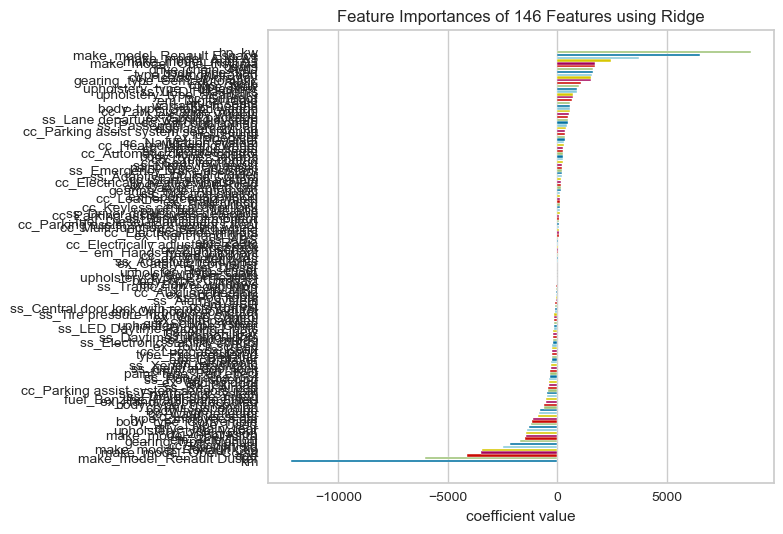

<AxesSubplot:title={'center':'Feature Importances of 146 Features using Ridge'}, xlabel='coefficient value'>

In [182]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [183]:
pipe_lassocv["lassocv"].alpha_

0.8220000000000001

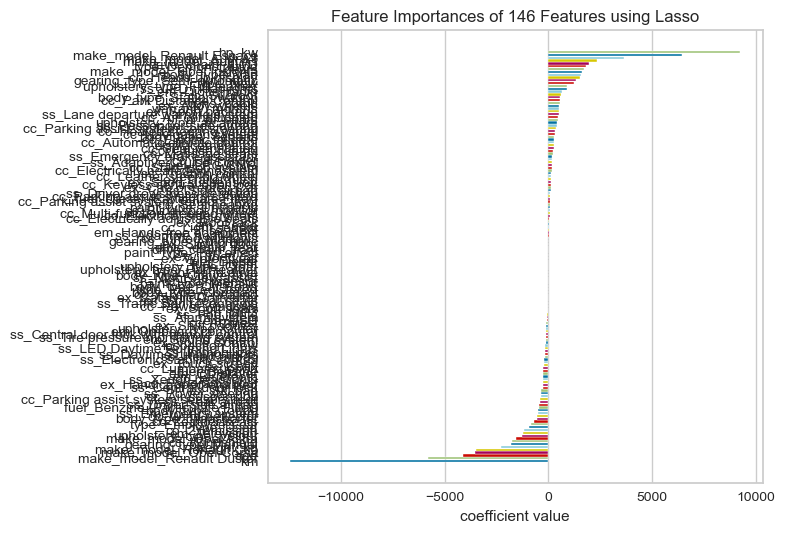

<AxesSubplot:title={'center':'Feature Importances of 146 Features using Lasso'}, xlabel='coefficient value'>

In [184]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

In [185]:
viz.estimator.alpha

0.8220000000000001

In [186]:
viz.estimator.l1_ratio

1.0

In [187]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}').head(10)

,Coefficient_Viz_Lasso(alpha=0.8220000000000001)
km,-12426.151515
hp_kw,9222.919510
make_model_Renault Espace,6428.922964
make_model_Renault Duster,-5797.349093
age,-4101.715350
make_model_Audi A3,3645.140537
make_model_Opel Corsa,-3520.811542
make_model_Renault Clio,-3507.062689
make_model_Audi A1,2319.668993
weight_kg,-2279.539361


In [188]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False).head(11)

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
intercept,18854.969666
km,-12430.053307
hp_kw,9220.720162
make_model_Renault Espace,6432.060345
make_model_Renault Duster,-5827.477330
age,-4101.025304
make_model_Audi A3,3645.282584
make_model_Opel Corsa,-3522.415633
make_model_Renault Clio,-3508.671723
make_model_Audi A1,2320.277346


# 8. Final Model

In [189]:
df2.shape

(14092, 24)

In [190]:
df_final = df2[["make_model", "hp_kw", "km","age", "price", "gearing_type", "gears"]]
df_final

,make_model,hp_kw,km,age,price,gearing_type,gears
0,Audi A1,66.0,56013.0,3.0,15770,Automatic,5.0
1,Audi A1,141.0,80000.0,2.0,14500,Automatic,7.0
2,Audi A1,85.0,83450.0,3.0,14640,Automatic,5.0
3,Audi A1,66.0,73000.0,3.0,14500,Automatic,6.0
4,Audi A1,66.0,16200.0,3.0,16790,Automatic,5.0
...,...,...,...,...,...,...,...
14473,Renault Espace,165.0,1000.0,0.0,39950,Automatic,7.0
14474,Renault Espace,147.0,10.0,2.0,39950,Automatic,6.0
14475,Renault Espace,165.0,9900.0,0.0,39885,Automatic,7.0
14476,Renault Espace,146.0,15.0,0.0,39875,Automatic,6.0


In [191]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [193]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [194]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11273.0,0.172004,0.377401,0.0,0.0,0.0,0.0,1.0
make_model_Audi A3,11273.0,0.195245,0.396407,0.0,0.0,0.0,0.0,1.0
make_model_Opel Astra,11273.0,0.153287,0.360280,0.0,0.0,0.0,0.0,1.0
make_model_Opel Corsa,11273.0,0.146190,0.353312,0.0,0.0,0.0,0.0,1.0
make_model_Opel Insignia,11273.0,0.164641,0.370873,0.0,0.0,0.0,0.0,1.0
make_model_Renault Clio,11273.0,0.104497,0.305918,0.0,0.0,0.0,0.0,1.0
make_model_Renault Duster,11273.0,0.002040,0.045125,0.0,0.0,0.0,0.0,1.0
make_model_Renault Espace,11273.0,0.062095,0.241339,0.0,0.0,0.0,0.0,1.0
gearing_type_Automatic,11273.0,0.454449,0.497943,0.0,0.0,0.0,1.0,1.0
gearing_type_Manual,11273.0,0.516899,0.499737,0.0,0.0,1.0,1.0,1.0


In [195]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,2819.0,0.168499,0.374376,0.0,0.00,0.0,0.0,1.0
make_model_Audi A3,2819.0,0.197588,0.398250,0.0,0.00,0.0,0.0,1.0
make_model_Opel Astra,2819.0,0.167081,0.373114,0.0,0.00,0.0,0.0,1.0
make_model_Opel Corsa,2819.0,0.145796,0.352965,0.0,0.00,0.0,0.0,1.0
make_model_Opel Insignia,2819.0,0.158922,0.365668,0.0,0.00,0.0,0.0,1.0
make_model_Renault Clio,2819.0,0.097552,0.296761,0.0,0.00,0.0,0.0,1.0
make_model_Renault Duster,2819.0,0.003902,0.062356,0.0,0.00,0.0,0.0,1.0
make_model_Renault Espace,2819.0,0.060660,0.238748,0.0,0.00,0.0,0.0,1.0
gearing_type_Automatic,2819.0,0.442710,0.496795,0.0,0.00,0.0,1.0,1.0
gearing_type_Manual,2819.0,0.530685,0.499146,0.0,0.00,1.0,1.0,1.0


## Final Scores-Metrics

In [196]:
scaler = MinMaxScaler()
model = Lasso()

In [197]:
# pipeline is used to combine scaler and model
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
]) 

In [198]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso())])

In [199]:
y_pred = pipe_final.predict(X_test)
y_train_pred = pipe_final.predict(X_train)

In [200]:
fs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso") 
fs

0            lasso              
       lasso_train    lasso_test
R2    8.617423e-01  8.598534e-01
MAE   1.766238e+03  1.722370e+03
MSE   6.438532e+06  5.983392e+06
RMSE  2.537426e+03  2.446097e+03

## Final Cross Validate

In [201]:
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
])

In [202]:
scores = cross_validate(
    pipe_final, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [203]:
df_scores_finalcv = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_finalcv

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.080556,0.004904,0.867283,-1762.562475,-6.219674e+06,-2493.927413
1,0.079963,0.005569,0.859712,-1786.205623,-6.490331e+06,-2547.612808
2,0.080874,0.004792,0.847249,-1818.380929,-7.241119e+06,-2690.932681
3,0.076115,0.008922,0.872851,-1680.659490,-5.668531e+06,-2380.867734
4,0.080574,0.003210,0.860554,-1793.906405,-6.653398e+06,-2579.418089


In [204]:
df_scores_finalcv.iloc[:, 2:].mean()

test_r2                             8.615298e-01
test_neg_mean_absolute_error       -1.768343e+03
test_neg_mean_squared_error        -6.454610e+06
test_neg_root_mean_squared_error   -2.538552e+03
dtype: float64

In [205]:
fs

0            lasso              
       lasso_train    lasso_test
R2    8.617423e-01  8.598534e-01
MAE   1.766238e+03  1.722370e+03
MSE   6.438532e+06  5.983392e+06
RMSE  2.537426e+03  2.446097e+03

## GridSearchCV Final Model

In [206]:
scaler = MinMaxScaler()
model = Lasso()

In [207]:
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
])

In [208]:
alpha_space = np.linspace(0.1, 1, 19)
alpha_space

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [209]:
param_grid = {"lasso__alpha":alpha_space}

In [210]:
grid_model_final = GridSearchCV(
    estimator = pipe_final, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10
)

In [211]:
grid_model_final.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__lasso', 'estimator__scaler__clip', 'estimator__scaler__copy', 'estimator__scaler__feature_range', 'estimator__lasso__alpha', 'estimator__lasso__copy_X', 'estimator__lasso__fit_intercept', 'estimator__lasso__max_iter', 'estimator__lasso__normalize', 'estimator__lasso__positive', 'estimator__lasso__precompute', 'estimator__lasso__random_state', 'estimator__lasso__selection', 'estimator__lasso__tol', 'estimator__lasso__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [212]:
grid_model_final.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             scoring='neg_root_mean_squared_error')

In [213]:
y_pred = grid_model_final.predict(X_test)
y_train_pred = grid_model_final.predict(X_train)

In [214]:
gm_final = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso_grid_final")
gm_final

0          lasso_grid_final                      
     lasso_grid_final_train lasso_grid_final_test
R2             8.617575e-01          8.597984e-01
MAE            1.767586e+03          1.724068e+03
MSE            6.437824e+06          5.985741e+06
RMSE           2.537287e+03          2.446577e+03

In [215]:
df_scores_final = pd.concat([ls, rs, rcs, lss, lcs, es, gm, gm_final], axis = 1)
df_scores_final

0           linear                       ridge                     ridge_cv  \
      linear_train   linear_test   ridge_train    ridge_test ridge_cv_train   
R2    8.895963e-01  8.801484e-01  8.982934e-01  8.921045e-01   8.982337e-01   
MAE   1.743480e+03  1.754717e+03  1.545017e+03  1.522472e+03   1.544859e+03   
MSE   6.099597e+06  6.535391e+06  4.736381e+06  4.606469e+06   4.739161e+06   
RMSE  2.469736e+03  2.556441e+03  2.176323e+03  2.146269e+03   2.176962e+03   

0                          lasso                     lasso_cv                \
     ridge_cv_test   lasso_train    lasso_test lasso_cv_train lasso_cv_test   
R2    8.920832e-01  8.980160e-01  8.922592e-01   8.980868e-01  8.922810e-01   
MAE   1.521800e+03  1.546071e+03  1.519234e+03   1.545736e+03  1.519542e+03   
MSE   4.607379e+06  4.749296e+06  4.599865e+06   4.746001e+06  4.598932e+06   
RMSE  2.146481e+03  2.179288e+03  2.144730e+03   2.178532e+03  2.144512e+03   

0          elastic                     elastic_grid                    \
     elastic_train  elastic_test elastic_grid_train elastic_grid_test   
R2    6.337559e-01  6.329680e-01       8.980947e-01      8.922828e-01   
MAE   3.113190e+03  3.014823e+03       1.545701e+03      1.519593e+03   
MSE   1.705564e+07  1.566999e+07       4.745635e+06      4.598857e+06   
RMSE  4.129848e+03  3.958534e+03       2.178448e+03      2.144495e+03   

0          lasso_grid_final                        
     lasso_grid_final_train lasso_grid_final_test  
R2             8.617575e-01          8.597984e-01  
MAE            1.767586e+03          1.724068e+03  
MSE            6.437824e+06          5.985741e+06  
RMSE           2.537287e+03          2.446577e+03

In [216]:
grid_model_final.best_params_

{'lasso__alpha': 0.1}

In [217]:
grid_model_final.best_score_

-2538.8256061587963

In [218]:
lgm_df_final = get_coeff_intercept(
    grid_model_final.best_estimator_['lasso'].coef_, 
    grid_model_final.best_estimator_['lasso'].intercept_, 
    model_name=f'lasso_grid_final_{grid_model_final.best_params_}',
    columns=X_train.columns
)
lgm_df_final

,Coefficient_lasso_grid_final_{'lasso__alpha': 0.1}
make_model_Audi A1,1990.678940
make_model_Audi A3,3193.101945
make_model_Opel Astra,-2017.821585
make_model_Opel Corsa,-4220.139010
make_model_Opel Insignia,1491.570311
make_model_Renault Clio,-3552.841089
make_model_Renault Duster,-6604.625862
make_model_Renault Espace,8328.289574
gearing_type_Automatic,1567.328379
gearing_type_Manual,-372.004516


In [219]:
2945/df_final['price'].mean()

0.1667240304861684

# 8. Visually Compare Models Performance In a Graph

## 7. Visually Compare Models Scores

In [220]:
scores = df_scores_final.T
scores = scores.droplevel(0)
scores

,R2,MAE,MSE,RMSE
linear_train,0.889596,1743.480097,6.099597e+06,2469.736246
linear_test,0.880148,1754.716851,6.535391e+06,2556.441140
ridge_train,0.898293,1545.017267,4.736381e+06,2176.322839
ridge_test,0.892105,1522.471914,4.606469e+06,2146.268518
ridge_cv_train,0.898234,1544.859100,4.739161e+06,2176.961506
ridge_cv_test,0.892083,1521.799932,4.607379e+06,2146.480582
lasso_train,0.898016,1546.071049,4.749296e+06,2179.287984
lasso_test,0.892259,1519.234152,4.599865e+06,2144.729703
lasso_cv_train,0.898087,1545.735686,4.746001e+06,2178.531839
lasso_cv_test,0.892281,1519.542459,4.598932e+06,2144.512177


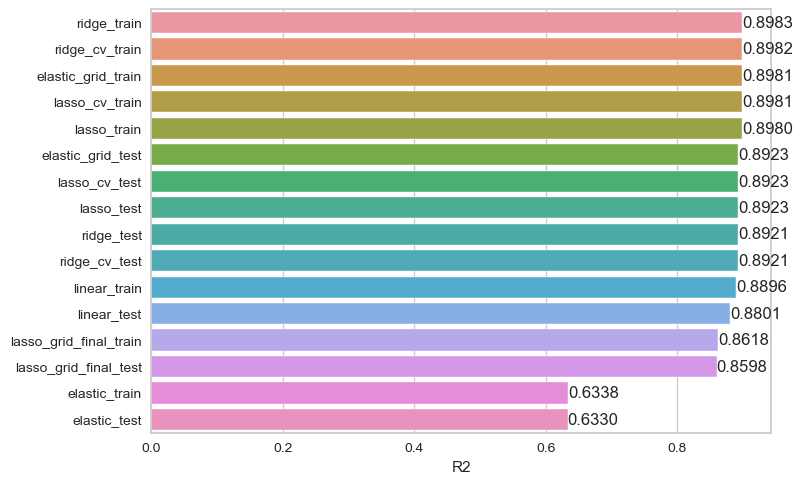

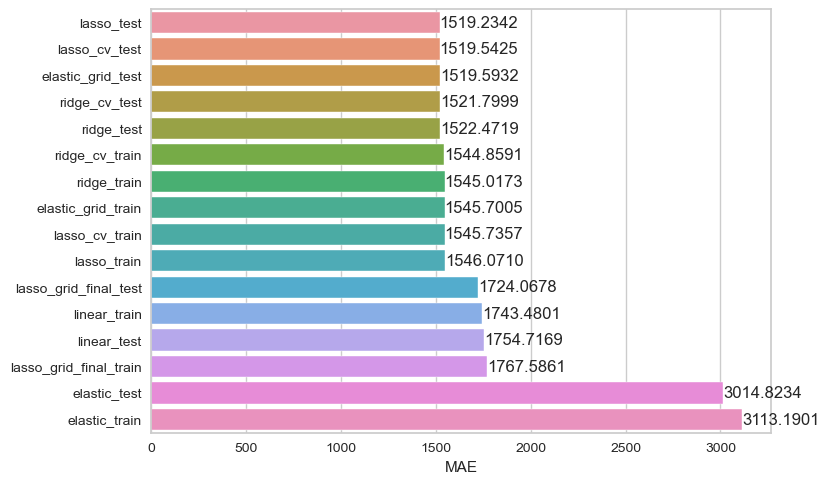

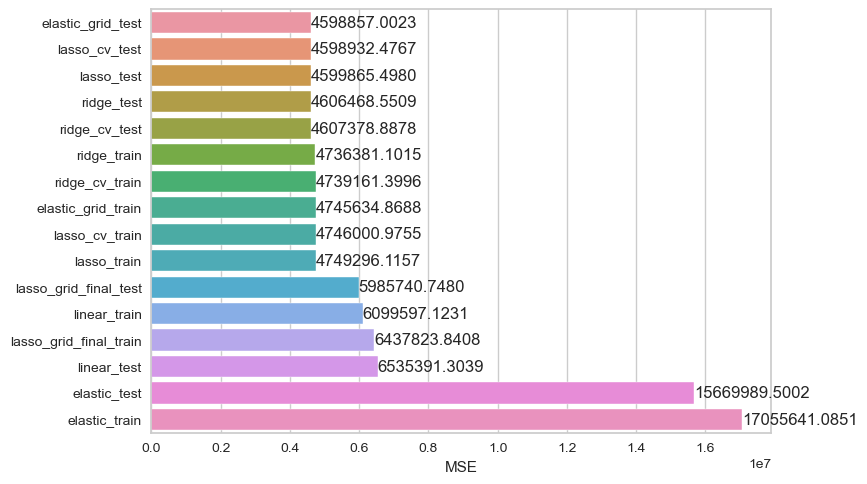

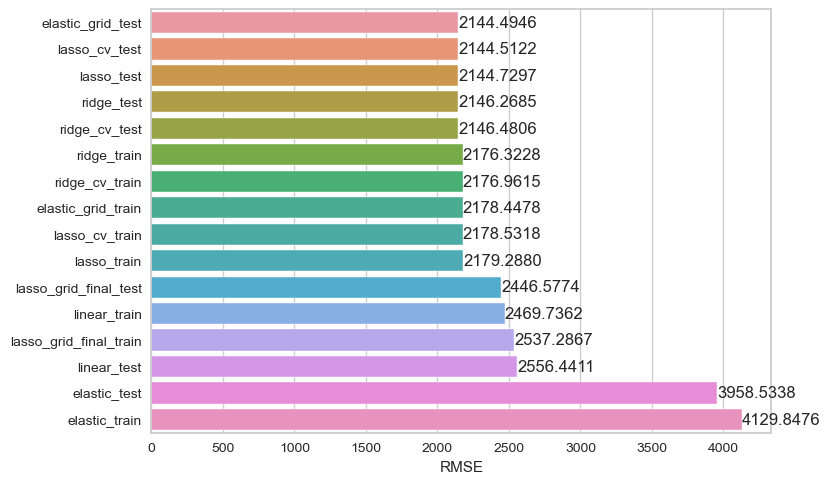

In [221]:
#metrics = scores.columns
for i, j in enumerate(scores):
    ascending = False if (j=="R2") else True
    compare = scores.sort_values(by=j, ascending=ascending)
    
    plt.figure(i)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

# Prediction new observation

In [222]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [223]:
X.head(2)

,make_model,hp_kw,km,age,gearing_type,gears
0,Audi A1,66.0,56013.0,3.0,Automatic,5.0
1,Audi A1,141.0,80000.0,2.0,Automatic,7.0


In [224]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type']

In [225]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso())
])
pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('Lasso', Lasso())])

In [227]:
my_dict = {
    "hp_kw": 66,
    "age": 2,
    "km": 17000,
    "gears": 7,
    "make_model": 'Audi A3',
    "gearing_type": "Automatic"
}

In [228]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kw,age,km,gears,make_model,gearing_type
0,66,2,17000,7,Audi A3,Automatic


In [229]:
pipe_model.predict(new_obs)

array([19676.87391232])

## Cross Validate With Pipeline

In [230]:
X = df_final.drop(columns=["price"])
y = df_final[["price"]]

In [231]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [233]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso())
])
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('lasso', Lasso())])

In [234]:
pipe_model.predict(new_obs)

array([19659.5676312])

In [235]:
y_pred = pipe_model.predict(X_test)   
y_train_pred = pipe_model.predict(X_train)

In [236]:
get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso")

0            lasso              
       lasso_train    lasso_test
R2    8.617423e-01  8.598534e-01
MAE   1.766238e+03  1.722370e+03
MSE   6.438532e+06  5.983392e+06
RMSE  2.537426e+03  2.446097e+03

In [237]:
pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso())
])

scores = cross_validate(
    pipe_model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=10
)

scores = pd.DataFrame.from_dict(scores, orient='columns')
scores.iloc[:,2:].mean()

test_r2                             8.613243e-01
test_neg_mean_absolute_error       -1.768791e+03
test_neg_mean_squared_error        -6.457500e+06
test_neg_root_mean_squared_error   -2.538984e+03
dtype: float64

## **`Result:________`**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___